# Information Theory

https://en.wikipedia.org/wiki/Information_theory  
https://www.basicknowledge101.com/pdf/km/Entropy%20(information%20theory).pdf  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
start = '2021-01-01'
end = '2022-01-01'
symbol = 'AMD'

In [3]:
df = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,147.509995,154.889999,147.250000,154.360001,154.360001,53296400
2021-12-28,155.880005,156.729996,151.380005,153.149994,153.149994,58699100
2021-12-29,152.820007,154.339996,147.289993,148.259995,148.259995,51300200
2021-12-30,147.440002,148.850006,144.850006,145.149994,145.149994,44358000
2021-12-31,146.160004,148.610001,143.550003,143.899994,143.899994,49448100


In [6]:
x = np.array(df['Adj Close']).squeeze()

In [7]:
import collections

outcomes = [item for item, count in collections.Counter(x).items() if count > 1]

In [8]:
outcomes = np.round(outcomes, 2)
outcomes

array([ 79.06,  82.76,  78.55, 106.15])

In [9]:
outcome_probabilities = [0.50, 0.50, 0.50, 0.50]

In [10]:
H = outcomes

for p in outcome_probabilities:
    H += (p*np.log2(p))

H = -H

print(H)

[ -77.06  -80.76  -76.55 -104.15]


In [11]:
data = {'Repeat Adj Close':outcomes,
        'Entropy':H}

In [12]:
IT_df = pd.DataFrame(data)
IT_df

,Repeat Adj Close,Entropy
0,77.06,-77.06
1,80.76,-80.76
2,76.55,-76.55
3,104.15,-104.15


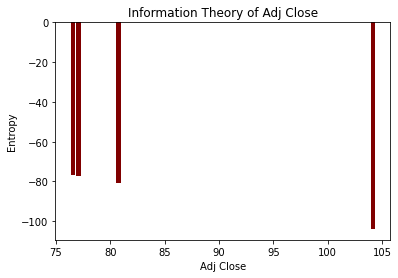

In [13]:
plt.bar(IT_df['Repeat Adj Close'], IT_df['Entropy'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Adj Close")
plt.ylabel("Entropy")
plt.title("Information Theory of Adj Close")
plt.show()

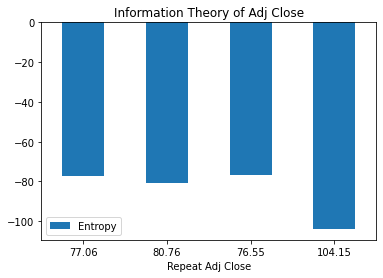

In [14]:
ax = IT_df.plot.bar(x='Repeat Adj Close', y='Entropy', rot=0, title = "Information Theory of Adj Close")